## Prediction over Voice dataset
### Here we are working with 
- linear regression model
- KNN model

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
# load dataset
file_path = 'voice.csv'
voice_df = pd.read_csv(file_path)
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
print(voice_df.shape)
voice_df.isnull().any()


(3168, 21)


meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm         False
mode        False
centroid    False
meanfun     False
minfun      False
maxfun      False
meandom     False
mindom      False
maxdom      False
dfrange     False
modindx     False
label       False
dtype: bool

# there is no null coloumn hence no missing value found

In [4]:
voice_df['label'].unique()

array(['male', 'female'], dtype=object)

## Converting categorial value to numerical

In [5]:
voice_df['label'] = np.where(voice_df['label']=='male',0,1)

In [6]:
voice_df[['label']].head()

,label
0,0
1,0
2,0
3,0
4,0


In [7]:
# 1. Load the "voice.csv" dataset and perform feature extraction by using "label" as target column
from sklearn.model_selection import train_test_split
import copy

voice_df_bkp = copy.deepcopy(voice_df)

y = voice_df_bkp['label']

voice_df_bkp.drop('label',axis=1,inplace=True)

X = voice_df_bkp.values

voice_df_bkp.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [8]:
print(len(y))

3168


In [9]:
# 2. Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

2534 2534
634 634


In [10]:
# 3. Build a Logistic Regression classifier to detect the target
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("accuracy = "+str(accuracy))
print("confusion matrix = \n "+ str(cm))

accuracy = 0.9148264984227129
confusion matrix = 
 [[323  10]
 [ 44 257]]


In [11]:
# 4. Check performances by using different number of features. Find the best set of features
from sklearn.feature_selection import RFE

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
for i in range(1,21):
   
    clf = LogisticRegression(random_state = 0)
    voice_df_bkp = copy.deepcopy(voice_df)

    y=voice_df_bkp['label']
    X=voice_df_bkp.loc[:, voice_df_bkp.columns != 'label']

    rfe = RFE(clf, i)
    rfe = rfe.fit(X,y)
    
    rfe_support = rfe.get_support()
    rfe_feature = X.loc[:,rfe_support].columns.tolist()
    print(str(len(rfe_feature)), 'selected features')
    print(rfe_feature)
    print("\n")
    X = voice_df_bkp[rfe_feature]
    y = voice_df_bkp['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

    clf = LogisticRegression(random_state = 0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)


    #Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print('Logistic Regressor')
    print("accuracy = "+str(accuracy))
    print("confusion matrix = \n "+ str(cm))
    print('\n\n')
    
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)


    #Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print('KNN')
    print("accuracy = "+str(accuracy))
    print("confusion matrix = \n "+ str(cm))
    print("\n\n")
    print("------------------------------------------------------\n\n")
    
   

1 selected features
['meanfun']


Logistic Regressor
accuracy = 0.9542586750788643
confusion matrix = 
 [[322  11]
 [ 18 283]]



KNN
accuracy = 0.9369085173501577
confusion matrix = 
 [[313  20]
 [ 20 281]]



------------------------------------------------------


2 selected features
['IQR', 'meanfun']


Logistic Regressor
accuracy = 0.9353312302839116
confusion matrix = 
 [[328   5]
 [ 36 265]]



KNN
accuracy = 0.9652996845425867
confusion matrix = 
 [[324   9]
 [ 13 288]]



------------------------------------------------------


3 selected features
['IQR', 'sp.ent', 'meanfun']


Logistic Regressor
accuracy = 0.9242902208201893
confusion matrix = 
 [[327   6]
 [ 42 259]]



KNN
accuracy = 0.9716088328075709
confusion matrix = 
 [[324   9]
 [  9 292]]



------------------------------------------------------


4 selected features
['Q25', 'IQR', 'sp.ent', 'meanfun']


Logistic Regressor
accuracy = 0.9211356466876972
confusion matrix = 
 [[326   7]
 [ 43 258]]



KNN
accuracy = 0.9

# It is seen that classifiers best performance is given by :
> 5 selected features
['Q25', 'Q75', 'IQR', 'sp.ent', 'meanfun']


> Logistic Regressor
  - accuracy = 0.9274447949526814
  - confusion matrix = 
     [[328   5]
     [ 41 260]]

> KNN
  - accuracy = 0.9794952681388013
  - confusion matrix = 
     [[327   6]
     [  7 294]]

after this prediction rate started detorating 

In [13]:
# 5. Build a KNN classifier to detect the label
feature= ['Q25', 'Q75', 'IQR', 'sp.ent', 'meanfun'] 
X = voice_df_bkp[feature]
y = voice_df_bkp['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy = "+str(accuracy))
print("confusion matrix = \n "+ str(cm))

accuracy = 0.9794952681388013
confusion matrix = 
 [[327   6]
 [  7 294]]


In [14]:
# 6. Find and plot the best value for k
n_neighbors = np.arange(1, 20, 1)
n_neighbors

accuracies = []
k_val = []
for n in n_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=n)
    knn_clf.fit(X_train, y_train)
    predictions = knn_clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    k_val.append(n)
a = list(zip(k_val,accuracies))
a

[(1, 0.9605678233438486),
 (2, 0.9621451104100947),
 (3, 0.9700315457413249),
 (4, 0.9763406940063092),
 (5, 0.9794952681388013),
 (6, 0.9779179810725552),
 (7, 0.9794952681388013),
 (8, 0.9794952681388013),
 (9, 0.9810725552050473),
 (10, 0.9779179810725552),
 (11, 0.9779179810725552),
 (12, 0.9763406940063092),
 (13, 0.9763406940063092),
 (14, 0.9763406940063092),
 (15, 0.9747634069400631),
 (16, 0.9763406940063092),
 (17, 0.973186119873817),
 (18, 0.9716088328075709),
 (19, 0.9716088328075709)]

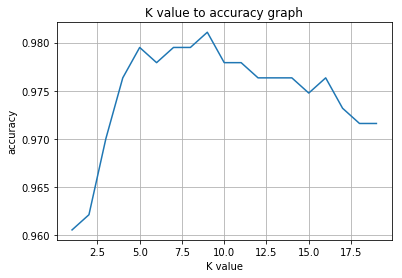

In [15]:
plt.xlabel("K value")
plt.ylabel("accuracy")
plt.grid(True)
plt.title("K value to accuracy graph")
plt.plot(k_val,accuracies)

# It turns out knn gives best accuracy over given dataset with 

> K Value = 9

> Features = ['Q25', 'Q75', 'IQR', 'sp.ent', 'meanfun'] 